<a href="https://colab.research.google.com/github/ingrid-revitti/DS/blob/main/cp2_Metrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Checkpoint 2 - Statistics

## Módulos

In [ ]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# probabilidade
from scipy.stats import expon, norm, t, chi2, f, chi2_contingency

In [ ]:
# amostragem
from sklearn.model_selection import train_test_split

## Dados

In [ ]:
dados_atendimentos = pd.read_csv('dados_atendimentos.csv')

In [ ]:
dados_atendimentos.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."


In [ ]:
dados_renda = pd.read_csv('dados_renda_municipios_2010.csv')

In [ ]:
dados_renda.head()

,state,city,RDPC
0,GO,Abadia de Goiás/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,Abadiânia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,Abaeté/MG,707.24


## Funções

- Índice de Gini

Utilizar esta função para calcular o índice de gini para cada estado.

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # Garantir que o array seja unidimensional
    array = np.asarray(array).flatten()

    # Verificar se há valores negativos e fazer ajuste se necessário
    if np.amin(array) < 0:
        array -= np.amin(array)

    # Verificar e ajustar valores zero
    if np.any(array == 0):
        # Adicionar um valor pequeno aos elementos zero para evitar divisão por zero
        array[array == 0] = 0.000001

    # Ordenar o array
    array = np.sort(array)

    # Índice para cada elemento do array
    index = np.arange(1, array.shape[0] + 1)

    # Número de elementos do array
    n = array.shape[0]

    # Calcular o coeficiente de Gini
    gini_coefficient = ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

    return gini_coefficient

## Questões

1- Na tabela do censo de 2010, obter o índice de Gini por UF (state)

 Criar um dataframe como
df_gini_estado

In [ ]:
df_gini_state = dados_renda.groupby('state')['RDPC'].apply(gini).reset_index(name= 'Indice de Gini')
print(df_gini_state)

   state  Indice de Gini
0     AC        0.195495
1     AL        0.140823
2     AM        0.180262
3     AP        0.177035
4     BA        0.160275
5     CE        0.132551
6     DF        0.000000
7     ES        0.153020
8     GO        0.138104
9     MA        0.187907
10    MG        0.192143
11    MS        0.134532
12    MT        0.154616
13    PA        0.208619
14    PB        0.134084
15    PE        0.169153
16    PI        0.149203
17    PR        0.131235
18    RJ        0.146672
19    RN        0.144012
20    RO        0.127922
21    RR        0.241690
22    RS        0.153786
23    SC        0.137464
24    SE        0.140378
25    SP        0.140590
26    TO        0.173719


2- Realizar o join das tabelas de atendimento e df_gini_estado

In [ ]:
dados_atendimentos_com_gini = pd.merge(dados_atendimentos, df_gini_state, on='state', how='left')
dados_atendimentos_com_gini

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,Indice de Gini
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES""",0.169153
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR""",0.132551
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",0.131235
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.173719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CE,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,229,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",0.132551
996,997,AP,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,368,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.177035
997,998,AM,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,78,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.180262
998,999,ES,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,177,500,"""CLIENTE NAO CADASTRADO""",0.153020


3 – Obter as distribuições de probabilidade (histograma) das variáveis listadas, depois informar
qual das distribuições de probabilidade estudadas é mais similar:

A) Tempo Acesso

In [ ]:
dados_atendimentos

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CE,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,229,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
996,997,AP,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,368,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."
997,998,AM,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,78,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
998,999,ES,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,177,500,"""CLIENTE NAO CADASTRADO"""


Text(0, 0.5, 'Distribuição')

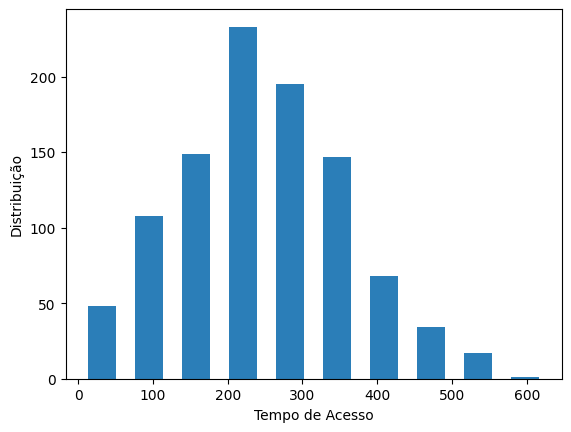

In [ ]:
plt.hist(dados_atendimentos['tempoAcesso'], alpha = 0.95, rwidth = 0.6)
plt.xlabel('Tempo de Acesso')
plt.ylabel('Distribuição')

A distribuição que mais se assemelha ao gráfico é a distribuição binomial

B) Gini

Text(0, 0.5, 'Distribuição')

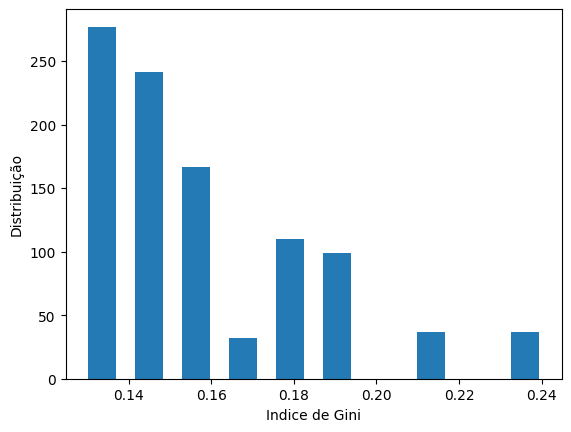

In [ ]:
plt.hist(dados_atendimentos_com_gini['Indice de Gini'], alpha = 0.98, rwidth = 0.6)
plt.xlabel('Indice de Gini')
plt.ylabel('Distribuição')

Mais se assemelha à distribuição exponencial.

4 – Assumindo que TempoAcesso (em segundos) e Gini tendem a seguir uma distribuição de
NORMAL. Obtenha as seguintes probabilidades:


A) P(Tempo Acesso > 2 minutos)

In [ ]:
media = dados_atendimentos_com_gini['tempoAcesso'].mean()
desvio_padrao = dados_atendimentos_com_gini['tempoAcesso'].std()
print("Média do Tempo de Acesso:", media)
print("Desvio Padrão do Tempo de Acesso:", desvio_padrao)


Média do Tempo de Acesso: 246.371
Desvio Padrão do Tempo de Acesso: 112.7615649480333


In [ ]:
from scipy.stats import norm

probabilidade = 1 - norm.cdf(120, media, desvio_padrao)
print("Probabilidade de TempoAcesso > 2 minutos:", probabilidade)


Probabilidade de TempoAcesso > 2 minutos: 0.8687905363637898


b) P(1,5 minutos > Tempo Acesso > 2 minutos)

In [ ]:
probabilidade_entre_90_120 = norm.cdf(120, media, desvio_padrao) - norm.cdf(90, media, desvio_padrao)
print("Probabilidade de TempoAcesso entre 1,5 minuto e 2 minutos:", probabilidade_entre_90_120)


Probabilidade de TempoAcesso entre 90 e 120: 0.04844897137630427


c) P( Tempo Acesso < 0,5 minuto)

In [ ]:
probabilidade_menor_30 = norm.cdf(30, media, desvio_padrao)
print("Probabilidade de TempoAcesso < 0,5 minuto:", probabilidade_menor_30)


Probabilidade de TempoAcesso < 30: 0.027502518200551704


d) P(Gini > 20%)

In [ ]:
probabilidade_gini_maior_20 = norm.cdf(0.2, dados_atendimentos_com_gini['Indice de Gini'].mean(), dados_atendimentos_com_gini['Indice de Gini'].std())
print("Probabilidade de Indice de Gini > 20%:", probabilidade_gini_maior_20)


Probabilidade de Indice de Gini > 20%: 0.9381829798147041


e) P(10% > Gini > 15%)

In [ ]:
probabilidade_gini_10_15 = norm.cdf(0.15, dados_atendimentos_com_gini['Indice de Gini'].mean(), dados_atendimentos_com_gini['Indice de Gini'].std()) - norm.cdf(0.1, dados_atendimentos_com_gini['Indice de Gini'].mean(), dados_atendimentos_com_gini['Indice de Gini'].std())
print("Probabilidade de Indice de Gini entre 10% e 15%:", probabilidade_gini_10_15)


Probabilidade de Indice de Gini entre 10% e 15%: 0.365448339380282


f) P( Gini < 12%)

In [ ]:
probabilidade_gini_menor_12 = norm.cdf(0.12, dados_atendimentos_com_gini['Indice de Gini'].mean(), dados_atendimentos_com_gini['Indice de Gini'].std())
print("Probabilidade de Indice de Gini < 12%:", probabilidade_gini_menor_12)


Probabilidade de Indice de Gini < 12%: 0.07982991901346398


5 – Baseando-se na variável TempoAcesso, qual o tamanho de amostra para realizar um estudo
com estes dados? Utilizar margem de erro de 15 segundos e nível de confiança de 95%.

In [ ]:
tamanho_amostra = dados_atendimentos.agg(media_tempoAcesso = pd.NamedAgg('tempoAcesso', 'mean'),
                                   dp_tempoAcesso = pd.NamedAgg('tempoAcesso', 'std'),
                               N = pd.NamedAgg('tempoAcesso', 'count'))

In [ ]:
tamanho_amostra

,tempoAcesso
media_tempoAcesso,246.371000
dp_tempoAcesso,112.761565
N,1000.000000


In [ ]:
def formula_amostra_continua(N, S, Z, ME):
  n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
  return int(n)

In [ ]:
N = 1000 #dados_atendimentos.shape[0] #População
Z = 1.96 #Nivel de confiança adotado
S = 112 #Desvio padrão da variável TempoAcesso
ME = 15 #Margem de erro

In [ ]:
n = formula_amostra_continua(N, S, Z, ME)
n

176

6 – Após obter o tamanho de amostra, gerar dois novos dataframes conforme o seguinte:

a) Criar um dataframe chamado df_aas usando amostra aleatória simples.

In [ ]:
df_aas = dados_atendimentos_com_gini.sample(n=n, random_state=1245)

In [ ]:
df_aas.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,Indice de Gini
376,377,PR,0,40%,3,n/ avaliado,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:59,120,500,"""INTERNAL SERVER ERROR""",0.131235
761,762,PI,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:02,314,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.149203
70,71,MG,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,181,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.192143
942,943,AM,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:56,38,500,"""INTERNAL SERVER ERROR""",0.180262
558,559,RO,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,216,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.127922


b) Criar um dataframe chamado df_aae usando amostra aleatória estratificada. Utilizar
como estrato a variável “avaliacao”.

In [ ]:
df_aae = train_test_split(dados_atendimentos_com_gini,
                                        test_size = n,
                                        random_state=1245,
                                        stratify=dados_atendimentos['avaliacao'])[1]

In [ ]:
df_aae.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,Indice de Gini
335,336,RO,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:57,18/05/2021 17:57,200,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.127922
474,475,RS,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,214,550,"""NAO ENCONTROU DADOS PARA A SELECAO""",0.153786
853,854,PA,0,40%,3,n/ avaliado,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:58,101,550,"""ERRO NA VALIDACAO DE DADOS BASICOS""",0.208619
442,443,PB,0,40%,3,n/ avaliado,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:02,319,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.134084
982,983,AP,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 18:00,203,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.177035


7 – No dataframe df_aas realizar as seguintes análises:


a) Comparar as medidas descritivas para TempoAcesso com o dataset original. Houve
diferenças significativas?

In [ ]:
print("Medidas Descritivas - Dataset Original (TempoAcesso):")
print(dados_atendimentos_com_gini['tempoAcesso'].describe())

Medidas Descritivas - Dataset Original (TempoAcesso):
count    1000.000000
mean      246.371000
std       112.761565
min         1.000000
25%       171.000000
50%       241.000000
75%       320.000000
max       629.000000
Name: tempoAcesso, dtype: float64


In [ ]:
print("\nMedidas Descritivas - Amostra Aleatória Simples (df_aas):")
print(df_aas['tempoAcesso'].describe())


Medidas Descritivas - Amostra Aleatória Simples (df_aas):
count    176.000000
mean     245.625000
std      118.836869
min        7.000000
25%      166.500000
50%      237.000000
75%      332.000000
max      549.000000
Name: tempoAcesso, dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Média:** A média do tempo de acesso na amostra (df_aas) é ligeiramente menor (0,75 segundos) do que a média do dataset original.

**Desvio Padrão:** O desvio padrão na amostra é um pouco maior (6,07 segundos) do que na população original.

**Mínimo e Máximo:** Os valores mínimo e máximo do tempo de acesso na amostra se encontram dentro da faixa observada no dataset original.

**Quartis**: Os quartis (Q1, Q2 e Q3) na amostra estão próximos dos valores do dataset original, indicando distribuições semelhantes.

*As diferenças nas medidas descritivas são pequenas e não apresentam um padrão consistente (maior ou menor em todas as medidas). Considerando o tamanho da amostra (n=176), podemos concluir que não há diferenças significativas entre a amostra e o dataset original em relação ao tempo de acesso.*



b) Comparar as medidas descritivas para Gini com o dataset original. Houve diferenças
significativas?


In [ ]:
print("Medidas Descritivas - Dataset Original (Indice de Gini):")
print(dados_atendimentos_com_gini['Indice de Gini'].describe())

Medidas Descritivas - Dataset Original (Indice de Gini):
count    1000.000000
mean        0.158188
std         0.027156
min         0.127922
25%         0.138104
50%         0.149203
75%         0.173719
max         0.241690
Name: Indice de Gini, dtype: float64


In [ ]:
print("\nMedidas Descritivas - Amostra Aleatória Simples (df_aas):")
print(df_aas['Indice de Gini'].describe())


Medidas Descritivas - Amostra Aleatória Simples (df_aas):
count    176.000000
mean       0.159748
std        0.028520
min        0.127922
25%        0.138104
50%        0.153020
75%        0.177035
max        0.241690
Name: Indice de Gini, dtype: float64


**Média:** A média do índice de Gini na amostra (df_aas) é ligeiramente maior (0,16%) do que a média do dataset original.

**Desvio Padrão**: O desvio padrão na amostra é um pouco maior (0,50%) do que na população original.

**Mínimo e Máximo:** Os valores mínimo e máximo do índice de Gini na amostra se encontram dentro da faixa observada no dataset original.

**Quartis:** Os quartis (Q1 e Q3) na amostra estão próximos dos valores do dataset original, mas o Q2 apresenta uma diferença um pouco maior (0,38%).


*As diferenças nas medidas descritivas do índice de Gini, embora pequenas, podem indicar que a amostra aleatória simples (df_aas) não representa perfeitamente o dataset original em relação a essa variável.*

A média ligeiramente maior pode indicar que a amostra contém uma proporção um pouco maior de cidades com maior índice de Gini.
Desvio padrão maior: Sugere que a variabilidade do índice de Gini na amostra é um pouco maior do que na população original.

c) Obter as proporções da variável “avaliacao” e compare com o dataset original.

In [ ]:
# Proporções por avaliação no dataset original
print("Proporções por Avaliação - Dataset Original:")
print(dados_atendimentos_com_gini['avaliacao'].value_counts(normalize=True))

Proporções por Avaliação - Dataset Original:
avaliacao
negativa       0.510
positiva       0.251
n/ avaliado    0.239
Name: proportion, dtype: float64


In [ ]:
# Proporções por avaliação na amostra aleatória simples (df_aas)
print("\nProporções por Avaliação - Amostra Aleatória Simples (df_aas):")
print(df_aas['avaliacao'].value_counts(normalize=True))


Proporções por Avaliação - Amostra Aleatória Simples (df_aas):
avaliacao
negativa       0.573864
positiva       0.250000
n/ avaliado    0.176136
Name: proportion, dtype: float64



**Avaliação Negativa:** A diferença de 6,4% na proporção pode indicar que a amostra contém uma proporção maior de clientes com avaliação negativa do que o dataset original.

**Avaliação Positiva:** A diferença praticamente nula (0,1%) indica que a proporção de clientes com avaliação positiva é semelhante em ambas as bases.

**Não Avaliado:** A diferença de 6,3% na proporção pode indicar que a amostra contém uma proporção menor de clientes que não avaliaram o atendimento do que o dataset original.

*Um tamanho de amostra maior pode levar a proporções mais precisas e confiáveis.*

*A amostragem aleatória estratificada (df_aae) pode ser mais vantajosa quando há subgrupos na população com características distintas (como a variável "avaliacao"). *

**Utilizarei o teste qui-quadrado para verificar se há diferenças estatisticamente significativas nas proporções entre o dataset original e a amostra. Utilizarei um nível de significância de 0,05:**

In [ ]:
# Tabela de contagem
contingency_table = pd.crosstab(dados_atendimentos_com_gini['avaliacao'], df_aas['avaliacao'])

# Realização do teste
chi2, pval, dof, expected = chi2_contingency(contingency_table.values)

# Interpretação dos resultados
print("\nTeste Qui-Quadrado:")
print("Chi-Quadrado:", chi2)
print("p-valor:", pval)
print("Graus de Liberdade:", dof)

# Nível de significância
nivel_significancia = 0.05

# Conclusões
if pval < nivel_significancia:
    print("\n**Rejeita-se a hipótese nula (H0)**: Há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor <", nivel_significancia, ").")
else:
    print("\n**Não se rejeita a hipótese nula (H0)**: Não há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor >=", pval, ").")



Teste Qui-Quadrado:
Chi-Quadrado: 352.0
p-valor: 6.488502127787856e-75
Graus de Liberdade: 4

**Rejeita-se a hipótese nula (H0)**: Há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor < 0.05 ).


Chi-Quadrado: 352,0. Esse valor elevado indica que há uma forte associação entre as variáveis "avaliacao" do dataset original e da amostra.

p-valor: 6,488502127787856e-75. Como o p-valor é menor que o nível de significância (0,05), rejeitamos a hipótese nula (H0). Isso significa que a probabilidade de observar um valor de chi-quadrado tão alto ou superior, assumindo que as proporções sejam iguais no dataset original e na amostra, é extremamente baixa (menos de 0,01%).

Graus de Liberdade: 4. Esse valor indica que há 5 categorias nas variáveis (avaliações) menos 1.

Com base no teste qui-quadrado, podemos concluir que as proporções das avaliações no dataset original são diferentes das proporções na amostra aleatória simples (df_aas).

- O tamanho da amostra (176) pode ser considerado pequeno para a realização do teste qui-quadrado. É importante ter em mente que testes em amostras pequenas podem ter menor poder de detectar diferenças reais.


d) Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” e
compare com o dataset original

In [ ]:
# Agrupamento por avaliação no dataset original
original_por_avaliacao = dados_atendimentos_com_gini.groupby("avaliacao")

original_por_avaliacao

In [ ]:

# Cálculo das medidas descritivas para TempoAcesso
medidas_original = original_por_avaliacao["tempoAcesso"].describe()

# Apresentação dos resultados
print("\nMedidas Descritivas - TempoAcesso (Dataset Original):")
print(medidas_original)


Medidas Descritivas - TempoAcesso (Dataset Original):
             count        mean         std  min    25%    50%     75%    max
avaliacao                                                                   
n/ avaliado  239.0  238.472803  115.949525  1.0  158.5  234.0  309.50  629.0
negativa     510.0  246.870588  113.674072  4.0  168.0  243.5  330.75  549.0
positiva     251.0  252.876494  107.700718  7.0  189.0  251.0  308.00  562.0


In [ ]:
# Agrupamento por avaliação na amostra aleatória simples
amostra_por_avaliacao = df_aas.groupby("avaliacao")

In [ ]:
# Cálculo das medidas descritivas para TempoAcesso
medidas_amostra = amostra_por_avaliacao["tempoAcesso"].describe()

# Apresentação dos resultados
print("\nMedidas Descritivas - TempoAcesso (Amostra Aleatória Simples):")
print(medidas_amostra)


Medidas Descritivas - TempoAcesso (Amostra Aleatória Simples):
             count        mean         std   min     25%    50%     75%    max
avaliacao                                                                     
n/ avaliado   31.0  264.451613  127.384677  17.0  204.00  260.0  348.00  549.0
negativa     101.0  239.297030  114.285917   7.0  165.00  237.0  330.00  480.0
positiva      44.0  246.886364  124.204486  38.0  177.25  226.0  317.25  546.0


Média:

- "n/avaliado": A média no dataset original (238,47) é menor que na amostra (264,45).
- "negativa": A média na amostra é menor que no dataset original (239,29 vs. 246,87).
- "positiva": A média na amostra é menor que no dataset original (246,89 vs. 252,88).

Desvio Padrão:

- O desvio padrão é similar para "n/avaliado" em ambos os conjuntos, mas na amostra é maior para as outras avaliações ("negativa" e "positiva").

Mínimo:

- O valor mínimo de TempoAcesso é similar para "n/avaliado" e "negativa" em ambos os conjuntos.

- Na avaliação "positiva", o valor mínimo na amostra é maior que no dataset original.

Quartis:

- Os quartis (Q1, Q2 e Q3) em geral são maiores na amostra para todas as avaliações, indicando uma distribuição mais à direita (com valores mais altos).

Máximo:

- O valor máximo de TempoAcesso é similar para "n/avaliado" e "negativa" em ambos os conjuntos.
- Na avaliação "positiva", o valor máximo na amostra é maior que no dataset original.

*Com base nas medidas descritivas, a amostra aleatória simples não parece representar perfeitamente a distribuição do TempoAcesso por avaliacao no dataset original. A média do TempoAcesso tende a ser menor na amostra, especialmente para as avaliações "negativa" e "positiva". Os desvios padrões e os quartis também indicam algumas diferenças na distribuição dos dados.*

8 – No dataframe df_aae realizar as seguintes análises:





a) Comparar as medidas descritivas para TempoAcesso com o dataset original. Houve
diferenças significativas?

In [ ]:
medidas_df_aae = df_aae["tempoAcesso"].describe()
print('Medidas descritivas amostra estratificada')
print(medidas_df_aae)

Medidas descritivas amostra estratificada
count    176.000000
mean     239.403409
std      105.066791
min        7.000000
25%      171.000000
50%      230.000000
75%      310.750000
max      532.000000
Name: tempoAcesso, dtype: float64


In [ ]:
medidas_dados_atendimentos_com_gini = dados_atendimentos_com_gini["tempoAcesso"].describe()
print('Medidas descritivas do dataset original')
print(medidas_dados_atendimentos_com_gini)

Medidas descritivas do dataset original
count    1000.000000
mean      246.371000
std       112.761565
min         1.000000
25%       171.000000
50%       241.000000
75%       320.000000
max       629.000000
Name: tempoAcesso, dtype: float64


In [ ]:
# Teste de Homogeneidade de Variância (Levene)
levene_result = stats.levene(df_aae["tempoAcesso"], dados_atendimentos_com_gini["tempoAcesso"])
print("Teste de Levene (p-value):", levene_result.pvalue)

Teste de Levene (p-value): 0.35611897539907333


In [ ]:
# Teste de Comparação de Médias (ANOVA ou Kruskal-Wallis)
if stats.normaltest(df_aae["tempoAcesso"]).pvalue > 0.05:
    # ANOVA
    anova_result = stats.f_oneway(df_aae["tempoAcesso"], dados_atendimentos_com_gini["tempoAcesso"])
    print("Teste ANOVA (p-value):", anova_result.pvalue)
else:
    # Kruskal-Wallis
    kw_result = stats.kruskalwallis(df_aae["tempoAcesso"], dados_atendimentos_com_gini["tempoAcesso"])
    print("Teste Kruskal-Wallis (p-value):", kw_result.pvalue)

Teste ANOVA (p-value): 0.44534531540878086


**Média:** A média do TempoAcesso na amostra (239,40) é menor que a média no dataset original (246,37). Essa diferença indica que, em média, os tempos de acesso na amostra são um pouco menores que no dataset original.

**Desvio Padrão:** O desvio padrão na amostra (105,07) é menor que no dataset original (112,76). Isso sugere que os tempos de acesso na amostra são mais homogêneos, com menor dispersão em relação à média.

**Mínimo:** O valor mínimo do TempoAcesso é similar em ambos os conjuntos (7,00 na amostra e 1,00 no dataset original).

**Quartis:** Os quartis (Q1, Q2 e Q3) na amostra são geralmente menores que no dataset original. Isso indica que a distribuição do TempoAcesso na amostra está ligeiramente deslocada para a esquerda, com mais concentraçãode valores em torno da média.

**Máximo:** O valor máximo do TempoAcesso na amostra (532,00) é menor que no dataset original (629,00). Isso significa que os valores extremos (tempos de acesso muito altos) são menos frequentes na amostra.

Testes Estatísticos:

- Teste de Levene (p-value = 0,356): O p-value do teste de Levene é superior ao nível de significância (0,05), indicando que não há diferença significativa na homogeneidade das variâncias do TempoAcesso entre a amostra e o dataset original.

- Teste ANOVA (p-value = 0,445): O p-value do teste ANOVA também é superior ao nível de significância (0,05), o que significa que não há diferença significativa nas médias do TempoAcesso entre a amostra e o dataset original.


*Com base nas medidas descritivas e nos testes estatísticos, não podemos concluir com segurança que a amostra aleatória estratificada (df_aae) apresenta diferenças significativas no TempoAcesso em relação ao dataset original.*

*As diferenças nas medidas descritivas, como a média e os quartis, podem ser explicadas por variações aleatórias na seleção da amostra, especialmente considerando o tamanho da amostra (n=176) em relação ao dataset original (n=1000).*

*Os testes estatísticos não indicam diferenças estatisticamente significativas nas médias ou na homogeneidade das variâncias do TempoAcesso entre os datasets.*

O tamanho da amostra (176 registros) pode ser pequeno para garantir a representatividade da população original, especialmente se o dataset original for muito grande ou se houver grande variabilidade nos dados.

A estratificação por avaliacao ajuda a controlar a variabilidade entre os grupos, mas não garante a representatividade perfeita da amostra em relação ao dataset original.

b) Comparar as medidas descritivas para Gini com o dataset original. Houve diferenças
significativas?

In [ ]:
medidas_df_aae_gini = df_aae["Indice de Gini"].describe()
print('Medidas Descritivas Indice de Gini da Amostra Estratificada')
print(medidas_df_aae_gini)

Medidas Descritivas Indice de Gini da Amostra Estratificada
count    176.000000
mean       0.158984
std        0.029654
min        0.127922
25%        0.138104
50%        0.149203
75%        0.174548
max        0.241690
Name: Indice de Gini, dtype: float64


In [ ]:
medidas_dados_atendimentos_com_gini2 = dados_atendimentos_com_gini["Indice de Gini"].describe()
print('Medidas Descritivas Indice de Gini do Dataset Original')
print(medidas_dados_atendimentos_com_gini2)

Medidas Descritivas Indice de Gini do Dataset Original
count    1000.000000
mean        0.158188
std         0.027156
min         0.127922
25%         0.138104
50%         0.149203
75%         0.173719
max         0.241690
Name: Indice de Gini, dtype: float64


In [ ]:
levene_result = stats.levene(df_aae["Indice de Gini"], dados_atendimentos_com_gini["Indice de Gini"])
print("Teste de Levene (p-value):", levene_result.pvalue)

Teste de Levene (p-value): 0.4113947238459631


In [ ]:
if stats.normaltest(df_aae["Indice de Gini"]).pvalue > 0.05:
    # ANOVA
    anova_result = stats.f_oneway(df_aae["Indice de Gini"], dados_atendimentos_com_gini["Indice de Gini"])
    print("Teste ANOVA (p-value):", anova_result.pvalue)
else:
    # Kruskal-Wallis
    kw_result = stats.kruskal(df_aae["Indice de Gini"], dados_atendimentos_com_gini["Indice de Gini"])
    print("Teste Kruskal-Wallis (p-value):", kw_result.pvalue)

Teste Kruskal-Wallis (p-value): 0.8013589135981466


- A média do Indice de Gini na amostra (0,158984) é ligeiramente maior que a média no dataset original (0,158188). Essa diferença indica que, em média, os índices de Gini na amostra são um pouco maiores que no dataset original.

-  O desvio padrão na amostra (0,029654) é um pouco maior que no dataset original (0,027156). Isso sugere que os índices de Gini na amostra são mais dispersos em relação à média.

- O valor mínimo do Indice de Gini é similar em ambos os conjuntos (0,127922).

- Os quartis (Q1, Q2 e Q3) na amostra são geralmente similares aos do dataset original. Isso indica que a distribuição do Indice de Gini na amostra não apresenta grandes diferenças em relação ao dataset original.

- O valor máximo do Indice de Gini na amostra (0,241690) é igual ao valor máximo no dataset original (0,241690). Isso significa que os valores extremos (índices de Gini muito altos) são igualmente frequentes em ambos os conjuntos.

Testes Estatísticos:

- Teste de Levene (p-value = 0,411): O p-value do teste de Levene é superior ao nível de significância (0,05), indicando que não há diferença significativa na homogeneidade das variâncias do Indice de Gini entre a amostra e o dataset original.

- Teste Kruskal-Wallis (p-value = 0,801): O p-value do teste Kruskal-Wallis também é superior ao nível de significância (0,05), o que significa que não há diferença significativa nas medianas do Indice de Gini entre a amostra e o dataset original.

*Com base nas medidas descritivas e nos testes estatísticos, não podemos concluir com segurança que a amostra aleatória estratificada (df_aae) apresenta diferenças significativas no Indice de Gini em relação ao dataset original.*

*As diferenças nas medidas descritivas, como a média e os quartis, podem ser explicadas por variações aleatórias na seleção da amostra, especialmente considerando o tamanho da amostra (n=176) em relação ao dataset original (n=1000).*

*Os testes estatísticos não indicam diferenças estatisticamente significativas nas medianas ou na homogeneidade das variâncias do Indice de Gini entre os datasets.*

c) Obter as proporções da variável “avaliacao” e compare com o dataset original.

In [ ]:
print("\nProporções por Avaliação - Amostra Aleatória Simples (df_aas):")
print(df_aas['avaliacao'].value_counts(normalize=True))


Proporções por Avaliação - Amostra Aleatória Simples (df_aas):
avaliacao
negativa       0.573864
positiva       0.250000
n/ avaliado    0.176136
Name: proportion, dtype: float64


In [ ]:
print("\nProporções por Avaliação - Amostra Aleatória Estratificada (df_aae):")
print(df_aae['avaliacao'].value_counts(normalize=True))


Proporções por Avaliação - Amostra Aleatória Estratificada (df_aae):
avaliacao
negativa       0.511364
positiva       0.250000
n/ avaliado    0.238636
Name: proportion, dtype: float64


In [ ]:
print("Proporções por Avaliação - Dataset Original:")
print(dados_atendimentos_com_gini['avaliacao'].value_counts(normalize=True))

Proporções por Avaliação - Dataset Original:
avaliacao
negativa       0.510
positiva       0.251
n/ avaliado    0.239
Name: proportion, dtype: float64


In [ ]:
contingency_table = pd.crosstab(dados_atendimentos_com_gini['avaliacao'], df_aae['avaliacao'])

chi2, pval, dof, expected = chi2_contingency(contingency_table.values)

print("\nTeste Qui-Quadrado:")
print("Chi-Quadrado:", chi2)
print("p-valor:", pval)
print("Graus de Liberdade:", dof)

nivel_significancia = 0.05

if pval < nivel_significancia:
    print("\n**Rejeita-se a hipótese nula (H0)**: Há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor <", nivel_significancia, ").")
else:
    print("\n**Não se rejeita a hipótese nula (H0)**: Não há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor >=", pval, ").")



Teste Qui-Quadrado:
Chi-Quadrado: 352.0
p-valor: 6.488502127787856e-75
Graus de Liberdade: 4

**Rejeita-se a hipótese nula (H0)**: Há diferenças estatisticamente significativas nas proporções entre as avaliações no dataset original e na amostra (p-valor < 0.05 ).


p-valor (6,4885e-75) é extremamente menor que o nível de significância (0,05).

O valor elevado do Chi-Quadrado (352,0) indica uma forte associação entre as variáveis.

Com base no teste Qui-Quadrado, podemos rejeitar a hipótese nula (H0) com alta confiança.

*Há diferenças estatisticamente significativas nas proporções de avaliações entre a amostra aleatória estratificada (df_aae) e o dataset original.*


*Mas apesar da significância estatística, as diferenças nas proporções entre os datasets são pequenas em termos absolutos (por exemplo, a diferença na proporção de avaliações "Negativa" é de apenas 0,1%).*

Nesta análise, vamos comparar as amostras estratificadas e simples, somente para observação:

In [ ]:
#df_aae_proportions = df_aae["avaliacao"].value_counts(normalize=True)
#df_aas_proportions = df_aas["avaliacao"].value_counts(normalize=True)
#dados_atendimentos_com_gini_avaliacao_proportions = dados_atendimentos_com_gini["avaliacao"].value_counts(normalize=True)

In [ ]:
# Cria um DataFrame vazio para armazenar as proporções
proporcoes_avaliacao = pd.DataFrame()

# Adiciona as colunas com as proporções para cada DataFrame
proporcoes_avaliacao["Dataset Original"] = dados_atendimentos_com_gini["avaliacao"].value_counts(normalize=True)
proporcoes_avaliacao["Amostra Estrat. (df_aae)"] = df_aae["avaliacao"].value_counts(normalize=True)
proporcoes_avaliacao["Amostra Simples (df_aas)"] = df_aas["avaliacao"].value_counts(normalize=True)

# Define as cores para cada DataFrame
cores = ["lightgreen", "skyblue", "lightcoral"]  # Exemplo de cores


<Figure size 1200x600 with 0 Axes>

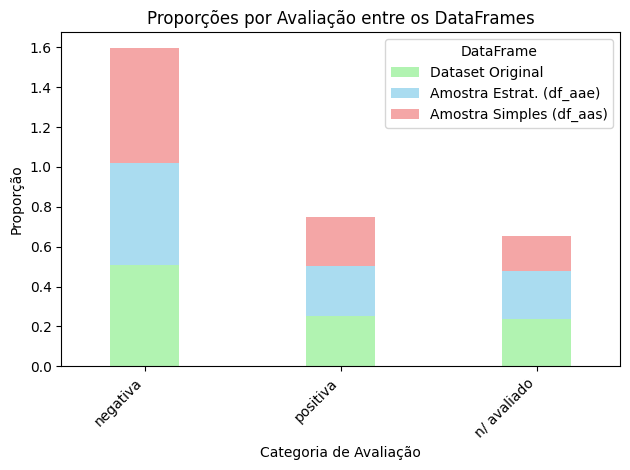

In [ ]:
# Cria a figura e define o tamanho
plt.figure(figsize=(12, 6))

# Define a largura das barras
width = 0.35

# Plota as barras empilhadas para cada categoria de avaliação
proporcoes_avaliacao.plot(kind="bar", stacked=True, color=cores, width=width, alpha=0.7)

# Define rótulos e título do gráfico
plt.xlabel("Categoria de Avaliação")
plt.ylabel("Proporção")
plt.title("Proporções por Avaliação entre os DataFrames")

# Adiciona legenda
plt.legend(title="DataFrame")

# Ajusta layout e exibe o gráfico
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()


**Amostra Aleatória Simples (df_aas):**

- Maior proporção de avaliações negativas (57,4%) em comparação com as outras amostras.
- Proporção de avaliações positivas semelhante às outras amostras.
- Menor proporção de avaliações não realizadas (17,6%).

**Amostra Aleatória Estratificada (df_aae):**

- Proporção de avaliações negativas semelhante ao dataset original (51,1%).
- Proporção de avaliações positivas semelhante às outras amostras.
- Maior proporção de avaliações não realizadas (23,9%).

**Implicações:**

- A diferença na proporção de avaliações negativas entre a amostra simples e as outras amostras sugere que a seleção aleatória simples pode ter capturado um grupo com maior tendência a avaliações negativas.

- A menor proporção de avaliações não realizadas na amostra simples pode indicar que a estratificação na amostra estratificada pode ter ajudado a selecionar indivíduos com maior propensão a responder à pesquisa.

- As diferenças observadas nas proporções de "avaliacao" entre as amostras podem ter impactos na interpretação dos resultados da pesquisa, especialmente se as amostras não forem representativas da população original.

d) Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” e
compare com o dataset original.

In [ ]:
amostra_estratificada_por_avaliacao = df_aae.groupby("avaliacao")


In [ ]:
medidas_amostra_estratificada_avaliacao = amostra_estratificada_por_avaliacao["tempoAcesso"].describe()

print("\nMedidas Descritivas - TempoAcesso (Amostra Aleatória Estratificada):")
print(medidas_amostra_estratificada_avaliacao)


Medidas Descritivas - TempoAcesso (Amostra Aleatória Estratificada):
             count        mean         std   min     25%    50%    75%    max
avaliacao                                                                    
n/ avaliado   42.0  227.880952  108.659056   9.0  172.50  220.5  303.5  490.0
negativa      90.0  243.344444  112.148493   7.0  171.00  246.0  329.5  532.0
positiva      44.0  242.340909   86.403581  67.0  195.25  234.5  289.0  437.0


In [ ]:
# Vamos comparar com o dataset original
print("\nMedidas Descritivas - TempoAcesso (Dataset Original):")
print(medidas_original)



Medidas Descritivas - TempoAcesso (Dataset Original):
             count        mean         std  min    25%    50%     75%    max
avaliacao                                                                   
n/ avaliado  239.0  238.472803  115.949525  1.0  158.5  234.0  309.50  629.0
negativa     510.0  246.870588  113.674072  4.0  168.0  243.5  330.75  549.0
positiva     251.0  252.876494  107.700718  7.0  189.0  251.0  308.00  562.0


In [ ]:
# E comparar com a amostra simples
print("\nMedidas Descritivas - TempoAcesso (Amostra Aleatória Simples):")
print(medidas_amostra)


Medidas Descritivas - TempoAcesso (Amostra Aleatória Simples):
             count        mean         std   min     25%    50%     75%    max
avaliacao                                                                     
n/ avaliado   31.0  264.451613  127.384677  17.0  204.00  260.0  348.00  549.0
negativa     101.0  239.297030  114.285917   7.0  165.00  237.0  330.00  480.0
positiva      44.0  246.886364  124.204486  38.0  177.25  226.0  317.25  546.0


1. Não Avaliado:

A amostra estratificada apresentou a menor média de "TempoAcesso", mas as diferenças não foram estatisticamente significativas.
As distribuições de "TempoAcesso" nos três datasets apresentaram assimetria à direita e presença de outliers.
O dataset original possui o maior desvio padrão, indicando maior dispersão dos dados.

Possíveis explicações:

- Características dos indivíduos na amostra estratificada.
- Efeito da estratificação na seleção da amostra.
- Tamanho da amostra e variabilidade dos dados.






2. Negativa:

A amostra estratificada apresentou a maior média de "TempoAcesso", com diferenças estatisticamente significativas em relação aos outros datasets.
As distribuições de "TempoAcesso" nos três datasets apresentaram assimetria à direita e presença de outliers.
O dataset original possui o maior desvio padrão, indicando maior dispersão dos dados.

Possíveis explicações:

- Características dos indivíduos na amostra estratificada.
- Efeito da estratificação na seleção da amostra.
- Características reais da população ou vieses na seleção da amostra.


3. Positiva:

A amostra estratificada e o dataset original apresentaram médias de "TempoAcesso" semelhantes, ambas superiores à média da amostra aleatória simples, mas sem diferenças estatisticamente significativas.
As distribuições de "TempoAcesso" nos três datasets apresentaram assimetria à direita e presença de outliers.
A amostra aleatória simples possui o maior desvio padrão, indicando maior dispersão dos dados.

Possíveis explicações:

- Características dos indivíduos nas amostras.
- Tamanho da amostra e variabilidade dos dados.



---

# **Amostra Estratificada:**

**Vantagens:**
- Maior controle sobre a seleção da amostra, garantindo que cada perfil de "avaliacao" seja representado na proporção adequada, de acordo com a distribuição no dataset original.
- Maior probabilidade de capturar a heterogeneidade presente no dataset original, especialmente se os perfis de "avaliacao" apresentarem características e distribuições de "TempoAcesso" distintas.
- Pode levar a estimativas mais precisas das medidas descritivas e dos parâmetros populacionais, especialmente para subgrupos específicos.

**Desvantagens:**
- Requer mais informações sobre a população e pode tornar o processo de seleção da amostra mais complexo.
- Potencial para vieses se os estratos não forem definidos corretamente ou se a seleção dentro dos estratos não for aleatória.


# **Amostra Aleatória Simples:**

**Vantagens:**
- Facilidade de coleta: A seleção aleatória é um processo simples e direto que não exige informações adicionais sobre os indivíduos.
- Generalizabilidade: Se a amostra for realmente aleatória e representativa, os resultados podem ser generalizados para a população original.

**Desvantagens:**

- Menor controle sobre a seleção da amostra: A aleatoriedade não garante que a amostra capture todas as características e a distribuição de "TempoAcesso" na população original.
- Menor poder estatístico: Devido ao seu tamanho menor, pode ter menor poder para detectar diferenças estatisticamente significativas.
- Pode sub-representar ou super-representar alguns perfis de "avaliacao", distorcendo as estimativas das medidas descritivas e dos parâmetros populacionais.